In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
from tensorflow import keras


In [62]:
df = pd.read_csv("train.csv")

In [63]:

df["label"].value_counts()
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [64]:
df["text"][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [66]:
#drop unecassary columns
df=df.drop(columns=["id","title","author"],axis=1)
# df = df.drop([0, 1, 2], axis=0) if you want to drop rows

In [67]:
df.isnull().sum()

,0
text,39
label,0


In [68]:
#drop null values
df=df.dropna(axis=0)

In [69]:
len(df)


20761

In [70]:

df["clean_news"]=df["text"].str.lower()

In [71]:
df["clean_news"]

,clean_news
0,house dem aide: we didn’t even see comey’s let...
1,ever get the feeling your life circles the rou...
2,"why the truth might get you fired october 29, ..."
3,videos 15 civilians killed in single us airstr...
4,print \nan iranian woman has been sentenced to...
...,...
20795,rapper t. i. unloaded on black celebrities who...
20796,when the green bay packers lost to the washing...
20797,the macy’s of today grew from the union of sev...
20798,"nato, russia to hold parallel exercises in bal..."


In [72]:
df["clean_news"]=df["clean_news"].str.replace('[^A-Za-z0-9\s]','')
df["clean_news"]=df["clean_news"].str.replace(',','')
df["clean_news"]=df["clean_news"].str.replace(':','')
df["clean_news"]=df["clean_news"].str.replace('\n','')
df["clean_news"]=df["clean_news"].str.replace('\s+',' ')

In [73]:
df["clean_news"]

,clean_news
0,house dem aide we didn’t even see comey’s lett...
1,ever get the feeling your life circles the rou...
2,why the truth might get you fired october 29 2...
3,videos 15 civilians killed in single us airstr...
4,print an iranian woman has been sentenced to s...
...,...
20795,rapper t. i. unloaded on black celebrities who...
20796,when the green bay packers lost to the washing...
20797,the macy’s of today grew from the union of sev...
20798,nato russia to hold parallel exercises in balk...


In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df["clean_news"] = df["clean_news"].apply(remove_stopwords)




# df["clean_news"] = df["clean_news"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [76]:
df["clean_news"]

,clean_news
0,house dem aide didn’t even see comey’s letter ...
1,ever get feeling life circles roundabout rathe...
2,truth might get fired october 29 2016 tension ...
3,videos 15 civilians killed single us airstrike...
4,print iranian woman sentenced six years prison...
...,...
20795,rapper t. i. unloaded black celebrities met do...
20796,green bay packers lost washington redskins wee...
20797,macy’s today grew union several great names am...
20798,nato russia hold parallel exercises balkans 11...


EDA

In [77]:
from wordcloud import WordCloud

In [78]:
#visualize the frequent words
all_words=' '.join([sentence for sentence in df["clean_news"]])

In [79]:
!pip install wordcloud matplotlib

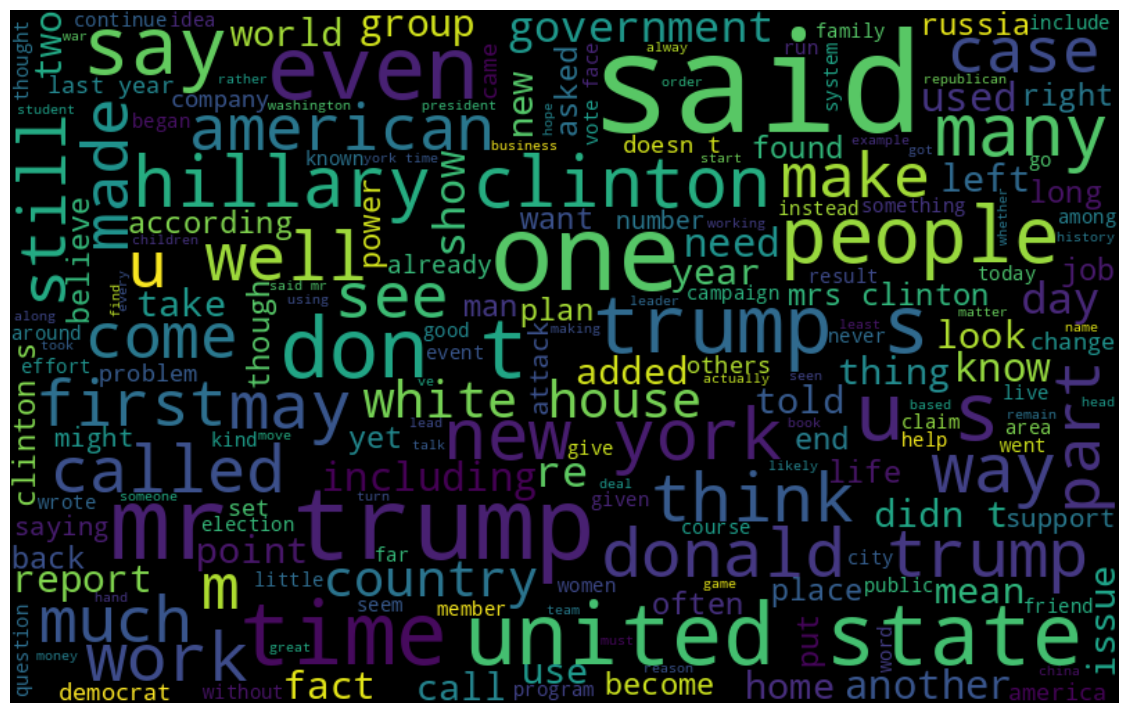

In [80]:
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

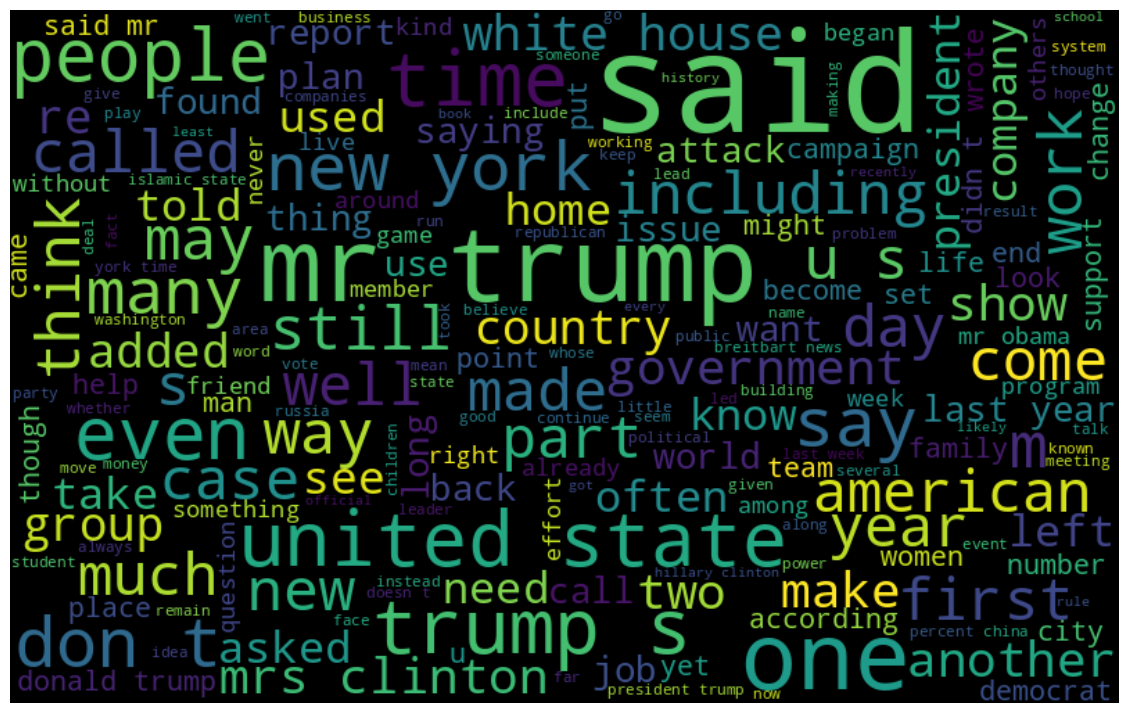

In [ ]:
#visualize the frequent words for genuine news
all_words=" ".join([sentence for sentence in df["clean_news"][df["label"]==0]])

wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

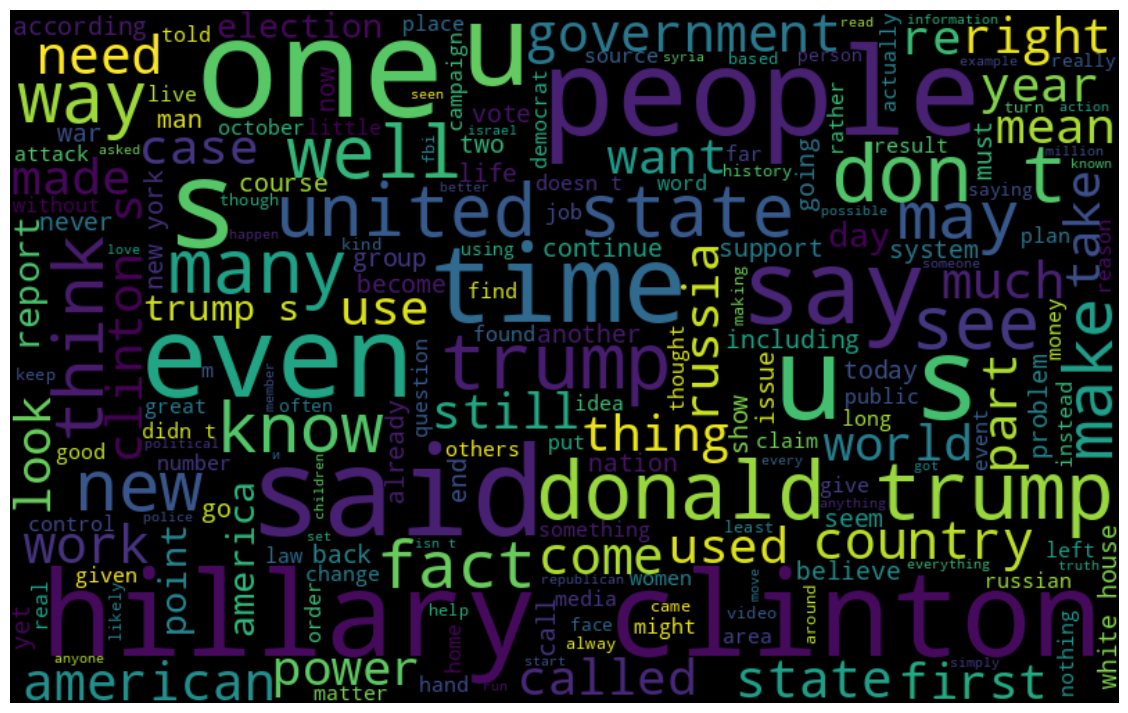

In [ ]:
#visualize the frequent words for fake news
all_words=" ".join([sentence for sentence in df["clean_news"][df["label"]==1]])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Create Word Embeddings[link text](https://)

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df["clean_news"])
word_index=tokenizer.word_index


In [83]:
word_index

{'said': 1,
 '”': 2,
 'mr': 3,
 '—': 4,
 'trump': 5,
 'one': 6,
 'would': 7,
 'people': 8,
 'new': 9,
 'like': 10,
 'also': 11,
 'president': 12,
 'clinton': 13,
 'time': 14,
 'us': 15,
 'could': 16,
 'many': 17,
 'state': 18,
 'even': 19,
 'years': 20,
 'two': 21,
 'states': 22,
 'first': 23,
 'american': 24,
 'government': 25,
 'it’s': 26,
 'last': 27,
 'united': 28,
 'year': 29,
 'news': 30,
 'world': 31,
 'get': 32,
 'hillary': 33,
 'may': 34,
 's': 35,
 '“the': 36,
 'ms': 37,
 'campaign': 38,
 'obama': 39,
 'election': 40,
 'going': 41,
 'make': 42,
 'way': 43,
 'u': 44,
 'made': 45,
 'house': 46,
 'know': 47,
 'much': 48,
 'back': 49,
 'white': 50,
 'think': 51,
 '“i': 52,
 'media': 53,
 'don’t': 54,
 'political': 55,
 'say': 56,
 'day': 57,
 '2016': 58,
 'see': 59,
 'country': 60,
 'trump’s': 61,
 'war': 62,
 'still': 63,
 'national': 64,
 'told': 65,
 'well': 66,
 'since': 67,
 '–': 68,
 'according': 69,
 'public': 70,
 'take': 71,
 'donald': 72,
 'want': 73,
 'police': 74,
 'w

In [34]:
vocab_size=len(word_index)
vocab_size

248803

In [35]:
sequences=tokenizer.texts_to_sequences(df["clean_news"])
padded_seq=pad_sequences(sequences,maxlen=500,padding="post",truncating="post")

In [87]:
padded_seq[0]

array([    46,   5736,   2206,    266,     19,     59,   2619,    681,
         3020,   7495,   2837,  12892,  27059,    264,    537,     58,
         3344,   3020,   7495,  12140,     24,  15330,   4075,   1002,
         4616,    651, 129622,    874,   2605,   6091,   3466,   2754,
        12141,   6107,  43755,   1381,   1441,    326,     31, 129623,
          207,    647,    511,     69,     46,    173,   2206,   1257,
           10,     11,     47,    287,   1441,    326,     66,   2036,
          511,    512,    795,   5605,    681,   4028,    203,    525,
          285,     34,    835,     33,    292,    168,   1323,   4841,
          248,   3138,   5247,    266,   1066,    511,    115,   1006,
         2197,      6,    106,    389,  13413,     47,    511,   7287,
          106,  13413,    173,   4841,    176,     46,    348,   4029,
         4169,   5247,    487,   5646,    285,    401,   1367,    169,
           59,   3234,   1543,    163,     87,    681,    274,   4169,
      

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_seq, df['label'], test_size=0.20, random_state=42, stratify=df['label'])

In [50]:
from keras.layers import LSTM,Dropout,Dense,Embedding
from keras import Sequential

In [51]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size + 1, output_dim=100, input_length=500))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [52]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
# train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.6135 - loss: 0.6571 - val_accuracy: 0.8534 - val_loss: 0.4214
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8277 - loss: 0.4582 - val_accuracy: 0.8141 - val_loss: 0.6213
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.7789 - loss: 0.5228 - val_accuracy: 0.5777 - val_loss: 0.6247
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.6214 - loss: 0.6107 - val_accuracy: 0.7337 - val_loss: 0.4870
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.7476 - loss: 0.4809 - val_accuracy: 0.5880 - val_loss: 0.6350
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.6042 - loss: 0.6209 - val_accuracy: 0.7021 - val_loss: 0.5791
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.7297 - loss: 0.5329 - val_accuracy: 0.8627 - val_loss: 0.4028
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8422 - loss: 0.4105 - val_accura

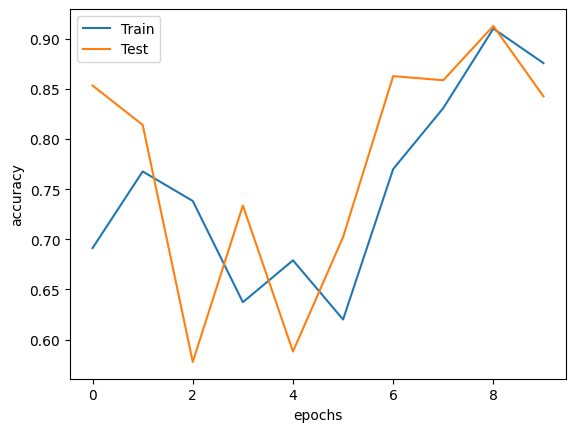

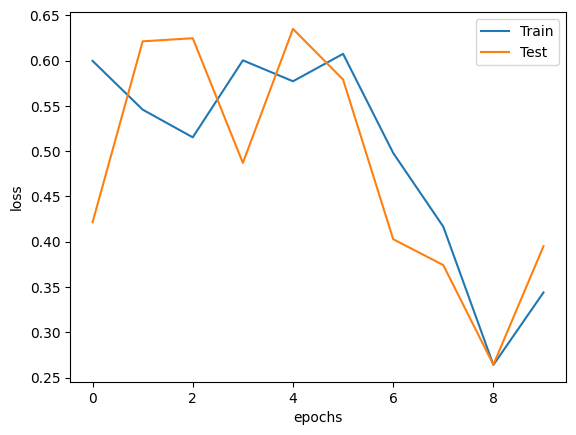

In [54]:
# visualize the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [58]:

y_pred = model.predict(x_test)  # Use your test padded sequences

# Convert predictions to binary labels
threshold = 0.5
y_pred_labels = (y_pred >= threshold).astype(int)  # Convert probabilities to binary labels



130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [88]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred_labels, average='weighted')  # or 'micro', 'macro', depending on your need
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred_labels, average='weighted')
print(f"Recall: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred_labels, average='weighted')
print(f"F1 Score: {f1:.4f}")



Accuracy: 0.8425
Precision: 0.8469
Recall: 0.8425
F1 Score: 0.8420


In [61]:
model.save("FakeNewsModel.h5")